Import all the necessary libraries

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# Suppress a specific warning
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

In [76]:
# read the csv file
df = pd.read_csv("banking_churn_dataset.csv")

In [77]:
# first five rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dataset Overview & Statistics

In [78]:
df.describe()

# Analysis: The mean number of customers who left the bank is 20% with the tenure of 5 and the credit score averaging to 650.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [79]:
# check the datatypes and null values
df.info()

# Analysis: There are no null values in the dataset. The data types are int64, float64, and object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [80]:
# RowNumber, CustomerId, Surname are not necessary for the analysis. Therefore, we can drop them
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Visualization

<Axes: xlabel='IsActiveMember', ylabel='count'>

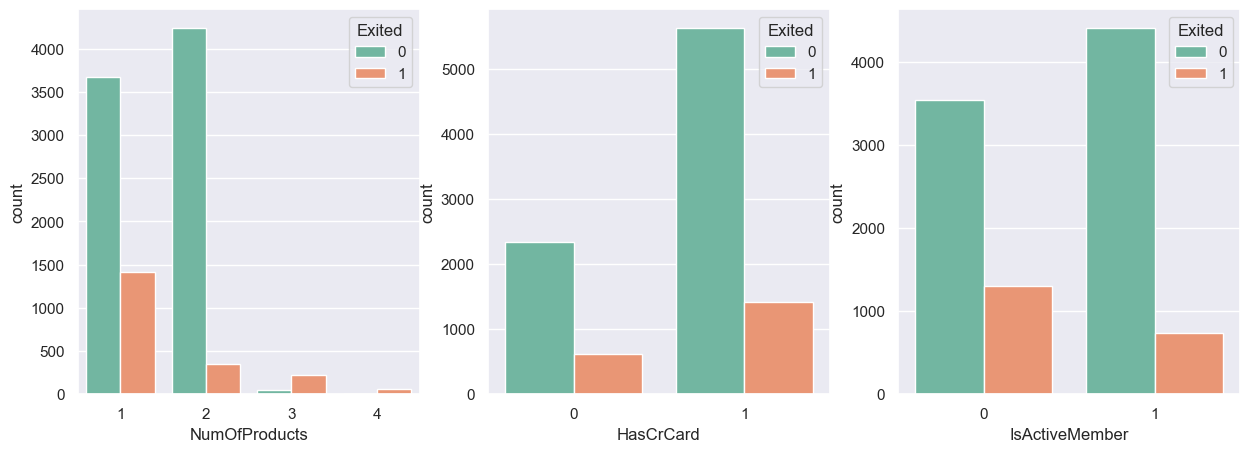

In [81]:
figure, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, ax=ax[0])
sns.countplot(x="HasCrCard", hue="Exited", data=df, ax=ax[1])
sns.countplot(x="IsActiveMember", hue="Exited", data=df, ax=ax[2])

# Analysis:
# 1. Customers with 1 or 2 products are more likely to stay with the bank. Few customers with 3 or 4 products, but among them, a significant portion tends to churn.
# 2. Customers who have a credit card are less likely to exit the bank compared to those who do not have one.
# 3. Active members are much less likely to churn compared to inactive members.

Encode categorical variables of Geography and Gender into numerical values

In [82]:
# The LabelEncoder is a tool used to convert categorical text data into numerical data, where each unique category is assigned an integer.
encoder = LabelEncoder()

# Fit: Learns the unique values in the "Geography" and "Gender" columns.
# Transform: Converts each unique category into a corresponding integer.

df["Geography"] = encoder.fit_transform(df["Geography"]) # Geography: France = 0, Spain = 1, Germany = 2
df["Gender"] = encoder.fit_transform(df["Gender"]) # Gender: Male = 1, Female = 0

<Axes: xlabel='Age'>

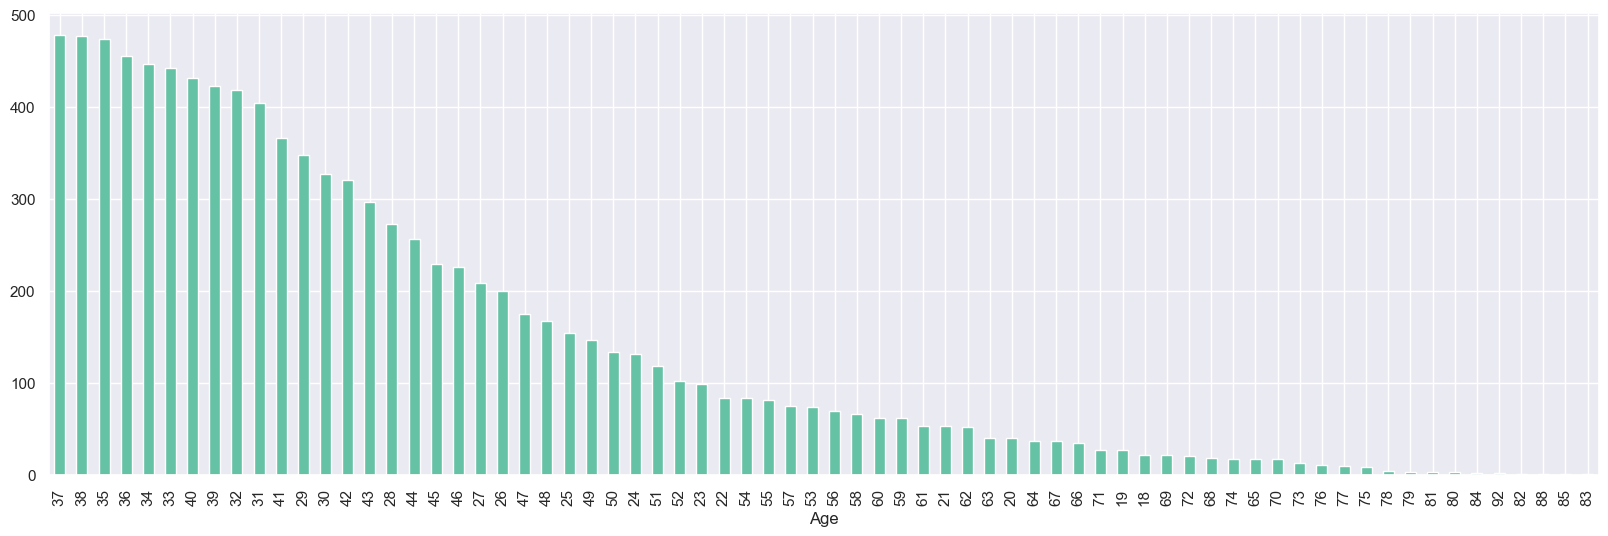

In [83]:
df["Age"].value_counts().plot.bar(figsize=(20,6))

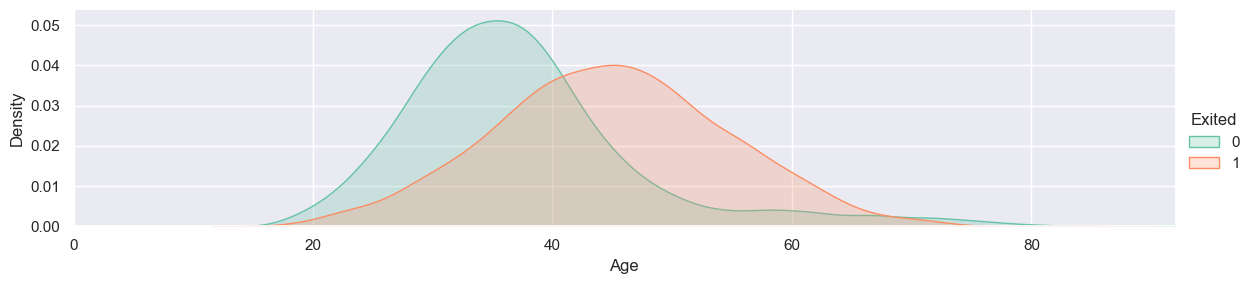

In [84]:
# sns.FacetGrid: This creates a grid for plotting
# hue="Exited": The hue parameter specifies that the data should be split by the "Exited" column
# An aspect of 4 means that the plot will be three times wider than it is tall.

df = df.replace([np.inf, -np.inf], np.nan)

facet = sns.FacetGrid(df, hue = "Exited", aspect = 4)

# map method applies a plotting function sns.kdeplot (kernel density estimate - smooth histrogram) to the data in the grid.
# "Age" values are put on the x-axis
facet.map(sns.kdeplot,"Age",fill= True)

# This sets the limits for the x-axis, ranging from 0 to the maximum value of the "Age" column in the dataset
facet.set(xlim=(0, df["Age"].max()))

# Adding a legend to the plot
facet.add_legend()
plt.show()

<Axes: xlabel='Age', ylabel='CreditScore'>

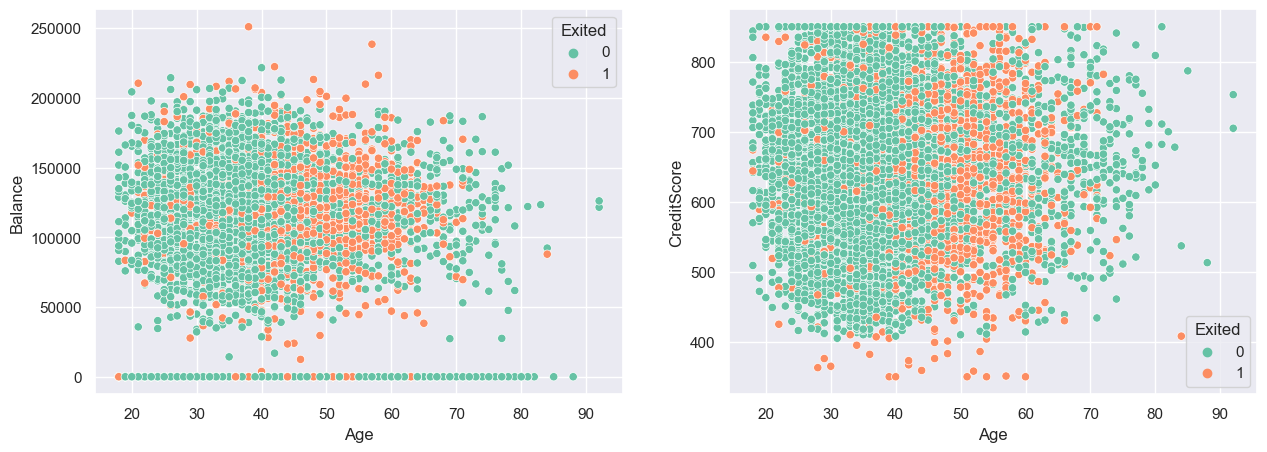

In [85]:
# Create a figure with two subplots arranged in a single row with the demansions of 15 by 5 inches
figure, ax =  plt.subplots(1, 2, figsize=(15, 5))

# hue = "Exited": Points are colored based on whether the customer exited (churned) or not.

sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", sizes = (10, 100), data = df, ax=ax[0])
# Analysis: Younger customers (below 30) have fewer cases of churn compared to older customers.
# There is a distinct pattern where older customers with higher balances tend to churn more, indicating that age and balance might be significant factors in predicting customer churn.

sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", sizes = (10, 100), data = df, ax=ax[1])
# Analysis: Customers with very low balances (below 400) always churn.
# The concentration of churn increases as the balance increases, particularly in the higher age brackets.

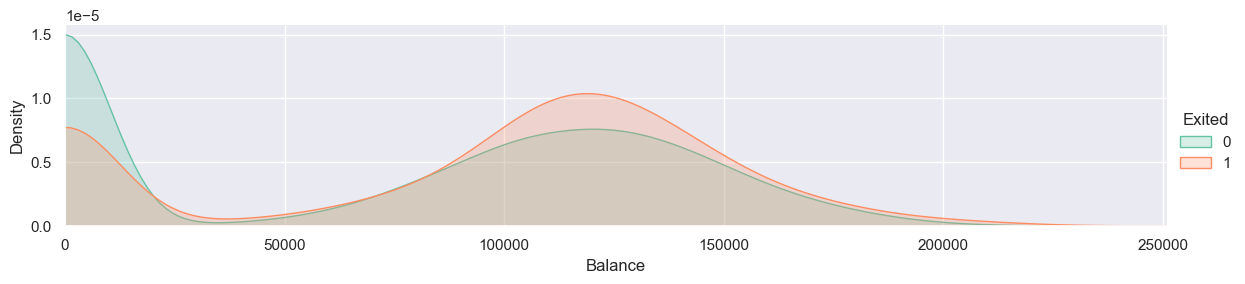

In [86]:
facet = sns.FacetGrid(df, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Balance",fill = True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()
plt.show()

# Analysis: Customers with low balances prefer not to exit the bank.
# While customers with high balances are more likely to churn.

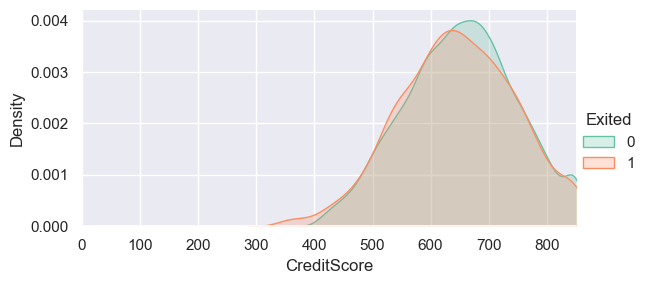

In [87]:
facet = sns.FacetGrid(df, hue="Exited", aspect = 2)
facet.map(sns.kdeplot,"CreditScore", fill = True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()
plt.show()

# Analysis: Customers with low credit scores (300 up to 400) prefer to churn.
# As the credit score grows, the rate of churn vs non-churn is almost identical.

Identify the Outliers

The Boxplot method is a simple yet effective way to detect outliers based on the statistical properties of the data. It relies on the IQR to determine which data points lie significantly outside the range of typical values, making it particularly useful in exploratory data analysis to identify potential anomalies or extreme values that may require further investigation.

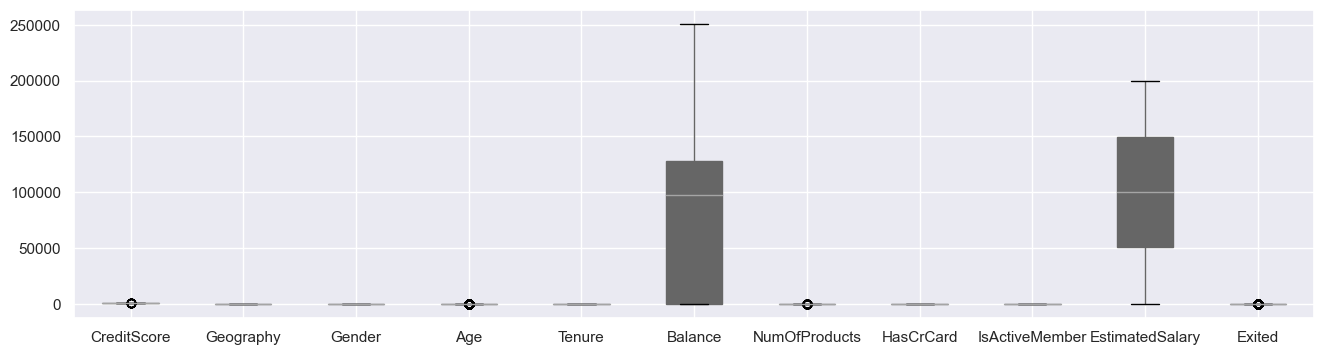

In [88]:
plt.figure(figsize=(16,4))
bplot = df.boxplot(patch_artist=True)    
plt.show()

Balance Analysis: The whiskers extend significantly, indicating a large range of values. There are no visible outliers beyond the whiskers, which means that all the data points fall withing the range.

Estimated Salary Analysis: The data is spread out more evenly, and there are no outliers.

Check the Correlation

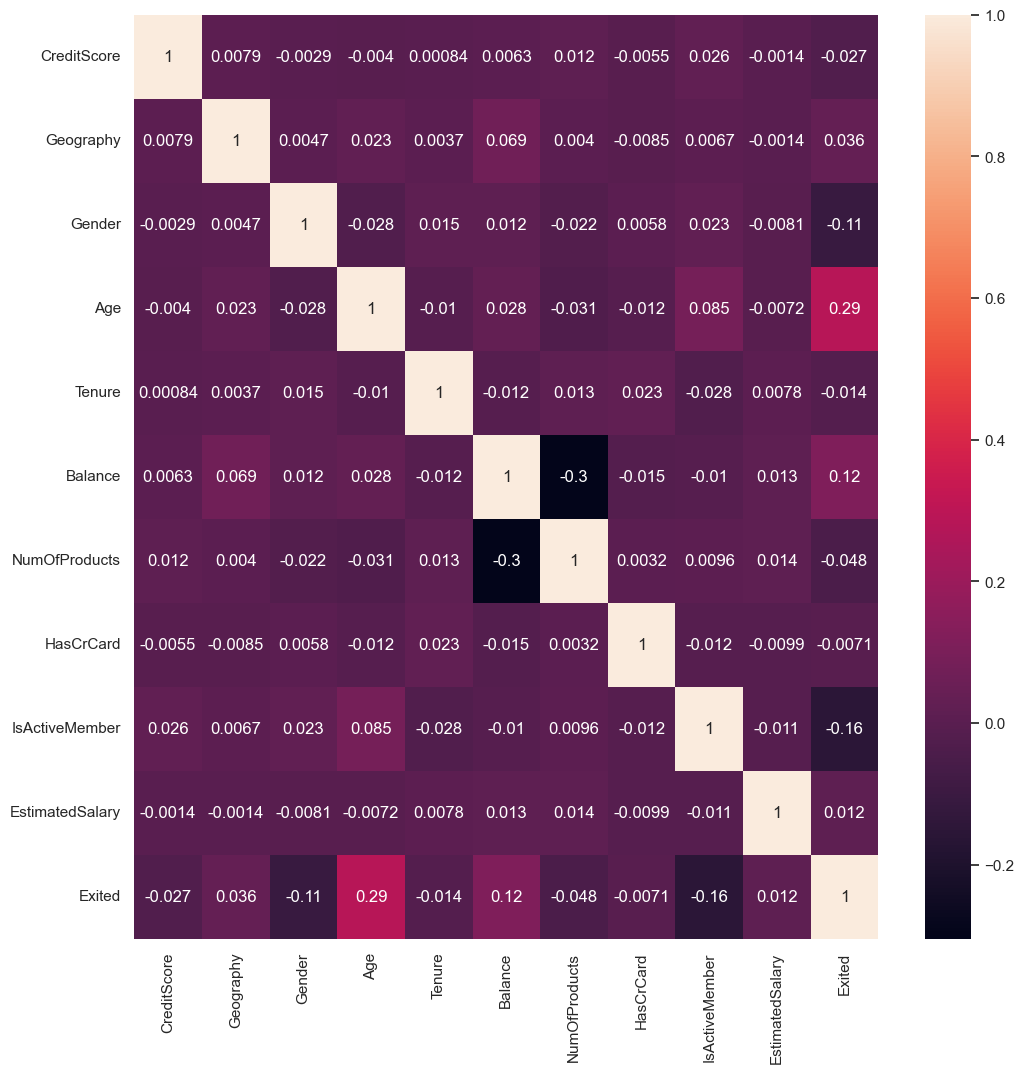

In [89]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Analysis: There is a very strong correlation between Exited and Age, IsActiveMember and Age

Prediction with Gaussian Naive Bayes model

In [90]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [91]:
# Initializing the Gaussian Naive Bayes model
gnb = GaussianNB()

# Training the model
gnb.fit(x_train, y_train)

# Making predictions on the test data
y_pred = gnb.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.7844
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      1991
           1       0.37      0.08      0.13       509

    accuracy                           0.78      2500
   macro avg       0.59      0.52      0.51      2500
weighted avg       0.72      0.78      0.73      2500



Prediction with Logistic Regression model

In [92]:
# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # max_iter is increased to ensure convergence

# Training the model
log_reg.fit(x_train, y_train)

# Making predictions on the test data
y_pred = log_reg.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.7876
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1991
           1       0.36      0.06      0.10       509

    accuracy                           0.79      2500
   macro avg       0.58      0.52      0.49      2500
weighted avg       0.71      0.79      0.72      2500



Prediction with Random Forest model

In [100]:
# Initializing the Random Forest model
rfc = RandomForestClassifier(random_state=300, n_estimators=300)

# Training the model
rfc.fit(x_train, y_train)

# Making predictions on the test data
y_pred = rfc.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.8664
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.50      0.61       509

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



Prediction with XGBClassifier

In [103]:
# Initializing the XGBoost classifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Training the model
xgb.fit(x_train, y_train)

# Making predictions on the test data
y_pred = xgb.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.8564
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1991
           1       0.70      0.52      0.60       509

    accuracy                           0.86      2500
   macro avg       0.79      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



Let's analyze all the prediction models used.

Overall, the accuracy of the models is very high, ranging from 78.44% for Gaussian Naive Bayes and reaching 86.65% for Random Forest.
All the models demonstrated great results for the non-churned instances. 
However, the precision and recall was not that good for all the models. 

Guassian Naive Bayes and Logistic Regression have the lowest precision of 0.37 and 0.36, respectively.
Random Forest and XGBClassifier have the highest precision of 0.76 and 0.7, respectively.
As for the recall, the lowest values were observed in Guassian Naive Bayes and Logistic Regression, 8% and 6%. This is very low, meaning the model is missing a large number of actual churns.

Note: Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results. 

| Model                 | Accuracy  | Precision | Recall    | F1-score  |
|-----------------------|-----------|-----------|-----------|-----------|
|1. Gaussian Naive Bayes | 0.7844    | 0.37      | 0.08      | 0.81      |
|2. Logistic Regression  | 0.7876    | 0.36      | 0.06      | 0.81      |
|3. Random Forest        | 0.8664    | 0.76      | 0.50      | 0.84      |
|4. XGBClassifier        | 0.8564    | 0.7       | 0.52      | 0.84      |

Let's improve the XGB classifier.

First, we will scale the "CreditScore", "Age", "Balance", "EstimatedSalary".

In [107]:
# Transforms features by scaling each feature to a given range, usually between 0 and 1. 

# Define the features to scale
features_to_scale = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
# Scaled features can lead to more stable and efficient gradient descent, potentially speeding up convergence and improving the model's accuracy.

# Apply MinMaxScaler to selected features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(data=x)
X_scaled[features_to_scale] = scaler.fit_transform(x[features_to_scale])

In [108]:
X_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735
1,0.516,2,0,0.310811,1,0.334031,1,0,1,0.562709
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120
4,1.000,2,0,0.337838,2,0.500246,1,1,1,0.395400


Oversampling

In [176]:
x = X_scaled
sm  = SMOTE(random_state=40)
X_res, y_res = sm.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.25, random_state=0)

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 12],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Use the best parameters to train the final model
best_xgb = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Evaluate the improved model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 300}
Accuracy: 0.8872425916624812
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1981
           1       0.89      0.88      0.89      2001

    accuracy                           0.89      3982
   macro avg       0.89      0.89      0.89      3982
weighted avg       0.89      0.89      0.89      3982



In [178]:
# Define X and y
X = X_scaled

# Check the class distribution before applying SMOTE
print("Original class distribution:", Counter(y))

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Resampled class distribution:", Counter(y_res))

Original class distribution: Counter({0: 7963, 1: 2037})
Resampled class distribution: Counter({1: 7963, 0: 7963})
